In [1]:
from robot.model import Robot
from utils.camera import Camera


In [2]:
robot = Robot("COM12")

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10
Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


O Axis 0 varia apenas a rotação do braço, dessa forma, podemos assumir que em todos podemos variar de 0 a 179, pois não há risco do robô espatifar
O Axis 1 Na posição inicial, ariando apenas ele, varia bem entre 80 e 150 

In [9]:
camera = Camera(0)

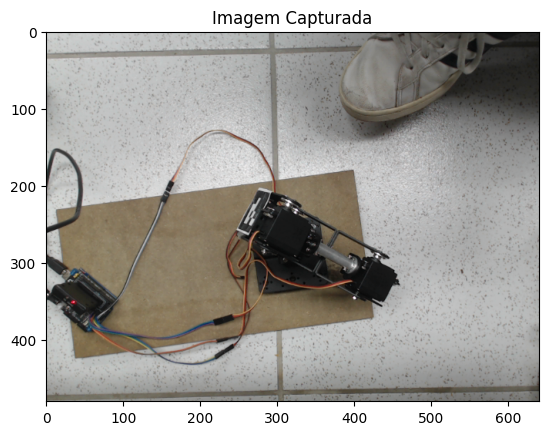

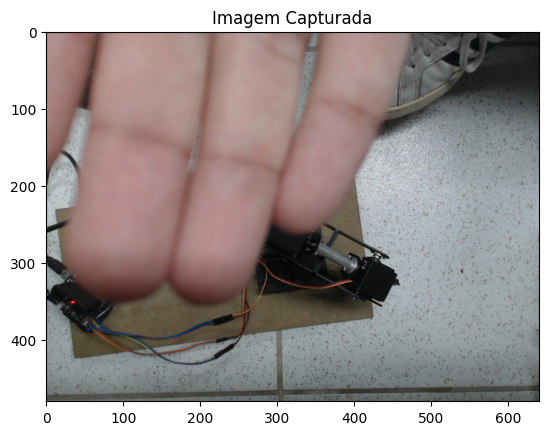

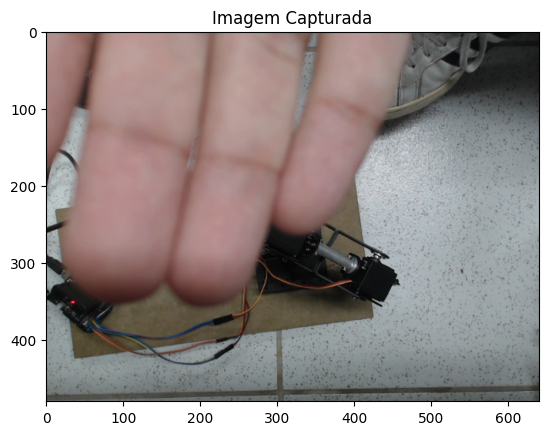

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 640,
 480)

In [42]:
camera.get_aruco0_positions(plot_image=True)
camera.get_aruco0_positions(plot_image=True)
camera.get_aruco0_positions(plot_image=True)

In [58]:
robot.close()
camera.release()

In [8]:
from utils.functions import ikine, mapping

angles = ikine([0.05, 0.05, 0.12], 0.1, 0.124,0.06)

angles = mapping(angles)
angles

robot.move_to(
    angles[0],
    angles[1],
    angles[2],
    angles[3]
)

Comando enviado: 0:125.0, 1:146.0643461094779, 2:172.2479912259844, 3:26.183645116506522


In [56]:
from itertools import product

step = 13
x_range =(-0.25, 0.25)
y_range =(-0.25, 0.25)

tested_positions = list(product(
        range(int(x_range[0]*1000), int(x_range[1]*1000), step),
        range(int(y_range[0]*1000), int(y_range[1]*1000), step)
    ))

len(tested_positions)

1521

In [57]:
tested_positions = list(filter(
    lambda x: not(abs(x[0]) < 40 or abs(x[1]) < 40), tested_positions
))

print(len(tested_positions))
tested_positions

1089


[(-250, -250),
 (-250, -237),
 (-250, -224),
 (-250, -211),
 (-250, -198),
 (-250, -185),
 (-250, -172),
 (-250, -159),
 (-250, -146),
 (-250, -133),
 (-250, -120),
 (-250, -107),
 (-250, -94),
 (-250, -81),
 (-250, -68),
 (-250, -55),
 (-250, -42),
 (-250, 49),
 (-250, 62),
 (-250, 75),
 (-250, 88),
 (-250, 101),
 (-250, 114),
 (-250, 127),
 (-250, 140),
 (-250, 153),
 (-250, 166),
 (-250, 179),
 (-250, 192),
 (-250, 205),
 (-250, 218),
 (-250, 231),
 (-250, 244),
 (-237, -250),
 (-237, -237),
 (-237, -224),
 (-237, -211),
 (-237, -198),
 (-237, -185),
 (-237, -172),
 (-237, -159),
 (-237, -146),
 (-237, -133),
 (-237, -120),
 (-237, -107),
 (-237, -94),
 (-237, -81),
 (-237, -68),
 (-237, -55),
 (-237, -42),
 (-237, 49),
 (-237, 62),
 (-237, 75),
 (-237, 88),
 (-237, 101),
 (-237, 114),
 (-237, 127),
 (-237, 140),
 (-237, 153),
 (-237, 166),
 (-237, 179),
 (-237, 192),
 (-237, 205),
 (-237, 218),
 (-237, 231),
 (-237, 244),
 (-224, -250),
 (-224, -237),
 (-224, -224),
 (-224, -211),


In [22]:
robot.move_to(
    angles[0],
    179,
    angles[2],
    60
)

Comando enviado: 0:131.34019174590992, 1:179, 2:172.5507440615227, 3:60


Testando posções para:  0.2 0.2


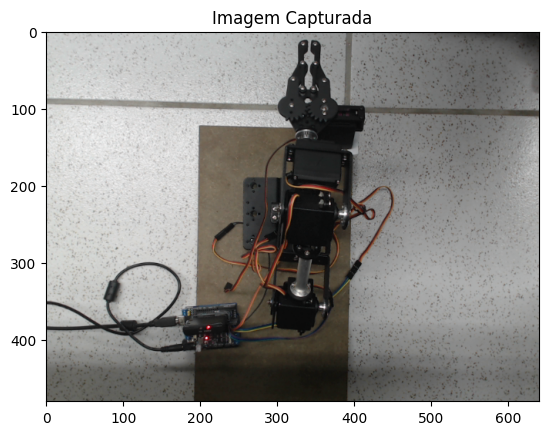

In [ ]:
from utils.train_data import get_data_train_inike

data = get_data_train_inike(
    robot, camera, 
    x_range = (-0.15,0.15), # Entre 0 e 30 cm
    y_range= (-0.15, 0.15), # Entre 0 e 30 cm
    step=5
)

In [8]:
robot.reset()

Comando enviado: 0:80, 1:130, 2:0, 3:100


In [15]:
from utils.functions import ikine
import math

positions = ikine([0.05, 0.0, 0.12], 0.1, 0.124, 0.06)
positions

[0.0, 2.9140582748489705, -2.136133807177682, -0.6033915424718554, 0, 0]

In [13]:
import numpy as np

def normalize_angle(angle_rad):
    """
    Normaliza um ângulo dado em radianos para o intervalo [0, 180] graus.
    """
    # Converte o ângulo para graus
    angle_deg = np.degrees(angle_rad)
    
    # Garante que o ângulo está no intervalo [0, 180]
    if angle_deg < 0:
        angle_deg += 360
    if angle_deg > 180:
        angle_deg -= 360

    return abs(angle_deg)

# Mapear para cada valor retornado pela função ikine
def map_ikine(theta_target):
    """
    Mapeia os valores das juntas para o intervalo [0, 180] graus.
    """
    return [normalize_angle(theta) for theta in theta_target]



In [16]:
map_ikine(positions)

[0.0, 166.96324040401967, 122.39145162649356, 34.57178877752608, 0.0, 0.0]

In [17]:
camera.release()
robot.close()